# Class 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/dhakarent/DhakaRent.csv")

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.tail()

,area,rent
35,1900,32300
36,1500,20200
37,1850,24000
38,2700,47500
39,2100,31500


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    40 non-null     int64
 1   rent    40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [6]:
df.shape

(40, 2)

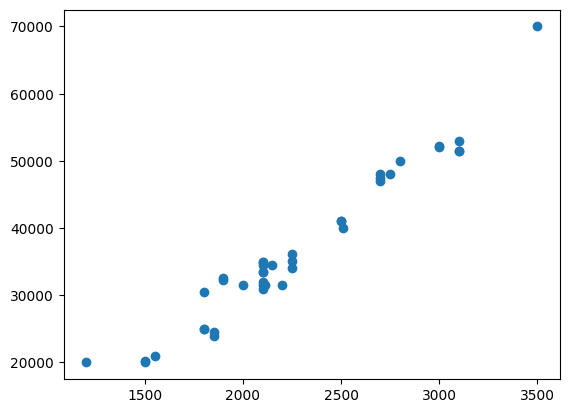

In [7]:
plt.scatter(df["area"],df["rent"])

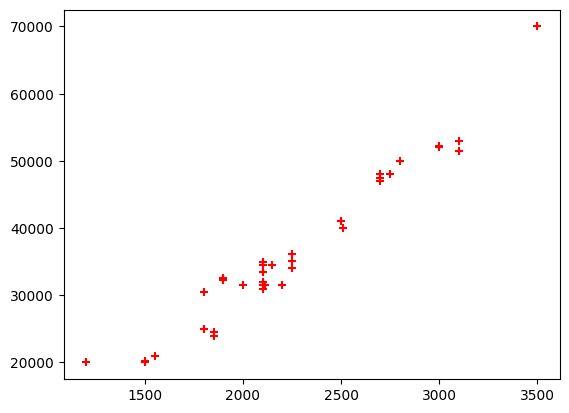

In [8]:
plt.scatter(df["area"],df["rent"],color="red",marker="+")

Text(0.5, 1.0, 'Rent Plot')

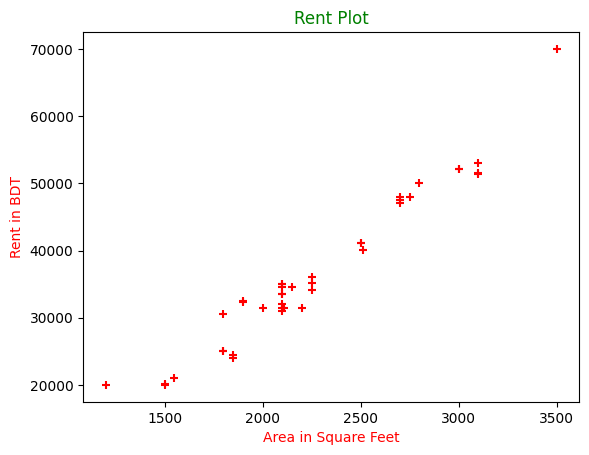

In [9]:
plt.scatter(df["area"],df["rent"],color="red",marker="+")
plt.xlabel("Area in Square Feet",color="red")
plt.ylabel("Rent in BDT",color="red")
plt.title("Rent Plot", color="green")

In [10]:
df.area.mean()

2265.5

In [11]:
df.rent.mean()

36704.25

## Seperate dependent and independent variable

In [12]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [13]:
x=df[["area"]]

In [14]:
y=df[["rent"]]

In [15]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [16]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


## split the database

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#train=70%
#test=30%

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30) #train_size=.70

In [19]:
xtrain.head()

,area
19,2700
25,3100
3,2250
13,2510
35,1900


In [20]:
xtest.shape

(12, 1)

In [21]:
xtrain.shape

(28, 1)

## Linear regression

In [22]:
from sklearn.linear_model import LinearRegression as lreg

In [23]:
reg= lreg()

In [24]:
reg.fit(xtrain,ytrain) #training the data

LinearRegression()

In [25]:
reg.predict([[2000]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[31477.9420101]])

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
reg.predict([[2000]])

array([[31477.9420101]])

In [28]:
ytest.head()

,rent
0,31500
7,24500
31,35010
11,32000
1,35000


In [29]:
ypred=reg.predict(xtest)
ypred

array([[31477.9420101 ],
       [28524.08169237],
       [33447.18222192],
       [33447.18222192],
       [33447.18222192],
       [22616.36105691],
       [35416.42243374],
       [27539.46158646],
       [46247.24359876],
       [36401.04253966],
       [51170.34412832],
       [61016.54518742]])

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mse= mean_squared_error(ytest,ypred)
mse

11182337.721305149

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mae= mean_absolute_error(ytest,ypred)
mae

2474.0093468838195

In [34]:
m= reg.coef_
m

array([[19.69240212]])

In [35]:
c=reg.intercept_
c

array([-7906.86222633])

In [36]:
#y=(m*x)+c
result=m*2000+c
result

array([[31477.9420101]])

In [37]:
reg.predict([[2000]])

array([[31477.9420101]])

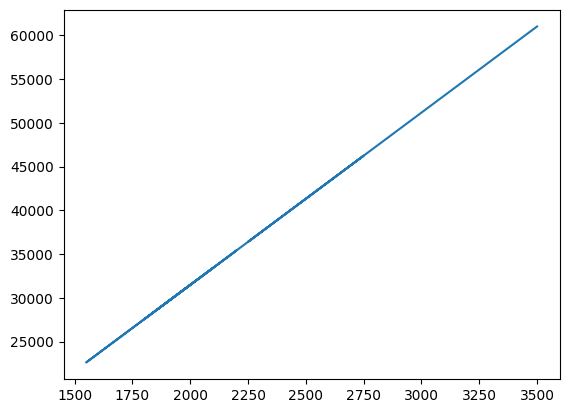

In [38]:
#best fit line
plt.plot(xtest,reg.predict(xtest))

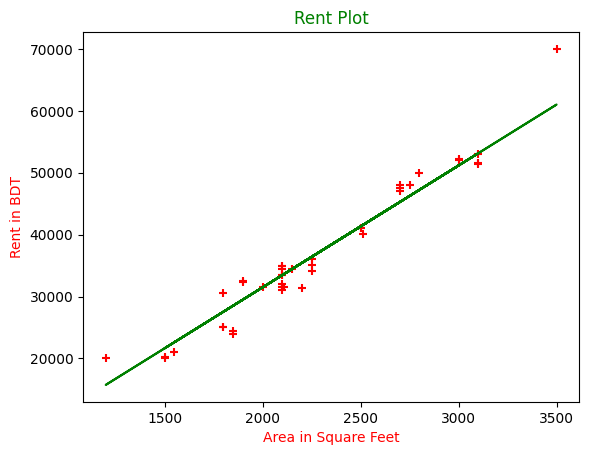

In [39]:
plt.scatter(df["area"],df["rent"],color="red",marker="+")
plt.xlabel("Area in Square Feet",color="red")
plt.ylabel("Rent in BDT",color="red")
plt.title("Rent Plot", color="green")
plt.plot(df.area,reg.predict(df[["area"]]),color="green") #for whole data